In [1]:
from sqlalchemy import create_engine
from database import database_path
engine = create_engine(database_path)
connection = engine.connect()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
salary_data = pd.read_sql("SELECT * FROM salaries", connection)

In [4]:
salary_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


Text(0.5, 1.0, 'Count of Employees in Each Salary Range')

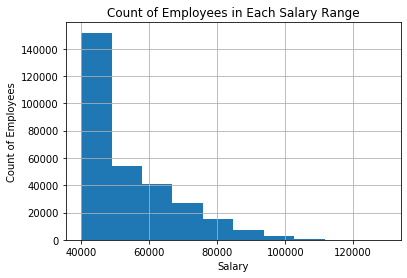

In [5]:
salary_data.hist(column='salary')
plt.xlabel('Salary')
plt.ylabel('Count of Employees')
plt.title('Count of Employees in Each Salary Range')

In [6]:
title_data = pd.read_sql("SELECT * FROM titles", connection)

In [7]:
title_data.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [8]:
employee_salary = pd.merge(title_data, salary_data, on='emp_no')
employee_salary.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [12]:
salary_groups = employee_salary.groupby('title')
title_salary = salary_groups.mean()
title_salary = title_salary[['salary']]
title_salary.head()

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614


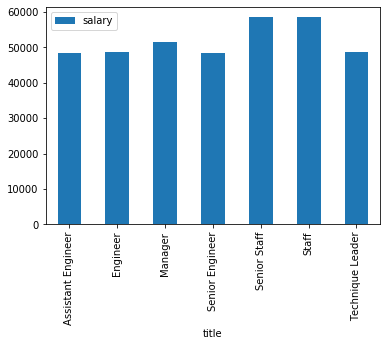

In [15]:
title_salary.plot(kind="bar")
plt.xlabel('Employee Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Title')